# Homework 8 Machine Learning
Shalom-David Anifowoshe and Yiping Deng

First, we try to load the data into python

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as la
from sklearn.decomposition import PCA

In [2]:
data = pd.read_csv("data/mfeat-pix.txt",sep='\s+', header=None)

In [3]:
darr = data.values.astype(float)

In [4]:
def img_cat(darr):
    """
    reshape the image and show the image
    """
    img_mat = darr.reshape(16, 15) # reshape the d array
    plt.imshow(img_mat, cmap='gray')
    plt.show()
def imgs_cat(darr):
    for rows in darr:
        img_cat(rows)

## Feature extraction 
Feature extraction is used in machine learning to derive values (features) that are important from a dataset. It is used to alleviate the effects of the curse of dimensionality by reducing the dimensions of the dataset.

## Types of features 
- Hand-made features refer to properties derived from human insight on information that is in the images.
- K-means based features groups a collection of training data points related clusters $C_1,..., C_K$. Each cluster  $C_i$ is then represented by a codebook vector $c_i$, these codebook vectors are then used to compress data.
- Principal Component Analysis (PCA) extracts features by converting a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables (principal components). It does this using an orthogonal transformation.


## In our program, we will use PCA for feature extraction:
### The steps in PCA algorithm follows:

- centering the data: mapping each vector $x_i \to \bar{x_i}$, where $\bar{x_i} = x_i - \bar{x}$
 - calculating the $\mu_1, \mu_2, ... \mu_m$, where $m$ is the number of principle components
   $\mu_i$ is calculated via $SVD$ algorithm.
   
   1. We calculate the correlation matrix $R$.
   2. Calculate the SVD via $$[U, \Sigma, V^*] = SVD(R)$$, where
   $$ R = U \Sigma V^* $$
   3. Extract the principle components $\mu_1, \mu_2, ... \mu_m$, where $ m < n$, by taking the first $m$ columns of $U$. 
 - Compression: we take each $\mu_1, \mu_2, \mu_3 ... $ and dot product the already centered $\bar{x_i}$ to obtain a vector $v \in \mathbb{R}^m$
 \begin{align*}
 v = \begin{bmatrix}
 \mu_1 \cdot \bar{x_i} \\
  \mu_2 \cdot \bar{x_i} \\
   \mu_3 \cdot \bar{x_i} \\
    \mu_4 \cdot \bar{x_i} \\
    ... \\
    \mu_m \cdot \bar{x_i}
 \end{bmatrix}
 \end{align*}
 - Decompression: we simply calculate
 $$ recovered = \sum_{i = 1}^{m} v_i \cdot \mu_i $$

Additionally, we split the training data into training set $X$ and test set $Xtest$, and build its associated label one-hot encoding vector matrix $Y$ and $Ytest$ 

## Adding bais

We then create a fuction to add the bias term to the features. Linear regression creates a model based on an affine function, which contains a bais term. Without it, we can only approximate the data using the linear function leading to an awful model.

In [5]:
def add_bais(X):
    # get the dimension
    N, D = X.shape
    Y = np.ones((N, D + 1))
    Y[:,:-1] = X
    return Y
def square_norm(x):
    return np.sum(np.power(x, 2))

## Use One-hot encoding to generate class vector
Since the dataset doesn't contain any kind of label, we need to generate a class vector for each label $\{0, 1, 2, ... 10\}$ as $v \in \mathbb{R}^{10}$. The following function will execute such a strategy.

In [6]:
def onehot_encode(digit):
    rst = np.zeros(10)
    rst[digit] = 1
    return rst

# Linear Regression Implementation
For a given dataset $data$ and a fixed number of feature $k$,
our algorithm of linear regression proceed as the following:
1. Performing a PCA algorithm to reduce the dimensions of $data$ from $\mathbb{R}^{240}$ to $\mathbb{R}^{k}$. Thus, we can view PCA algorithms as a function $PCA: \mathbb{R}^{240} \to \mathbb{R}^{k}$
2. Split the entire dataset after dimension reduction into training set features $X \in \mathbb{R}^{1000 \times k}$ and test set features $Xtest \in \mathbb{R}^{1000 \times k}$
3. Associate $X$ and $Xtest$ with bias term, thus we have $X, Xtest \in \mathbb{R}^{1000 \times (K + 1)}$ 
4. Build the correct class vector for training set as $Y \in \mathbb{R}^{1000 \times 10}$ and test set as $Ytest \in \mathbb{R}^{1000 \times 10}$. After such operation, we obtained the complete training set as $(X, Y)$ and the test set as $(Xtest, Ytest)$
5. Using the training set, compute the optimal weight matrix as
$$ Wopt^\top = (X^\top \cdot X)^{-1} \cdot X^\top \cdot Y $$
we can rewrite as
$$ Wopt = ((X^\top \cdot X)^{-1} \cdot X^\top \cdot Y)^\top $$
6. Calculate the error term.
First, we make the prediction:
$$ Ypred = (Wopt \cdot X^\top)^\top $$
$$ Ytestpred = (Wopt \cdot Xtest^\top)^\top $$
Using the prediction, we calculate the corresponding error
$$ MSE_{train}^k = \frac{\|Y - Ypred\|^2}{1000} $$
$$ MSE_{test}^k = \frac{\|Ytest - Ytestpred\|^2}{1000} $$
$$ MISS_{train}^k = \frac{\sum_{i = 1}^{1000} \min(1, \|\arg\max(Y_i) - \arg\max(Ypred_i)\|)}{1000} $$
$$ MISS_{test}^k = \frac{\sum_{i = 1}^{1000} \min(1, \|\arg\max(Ytest_i) - \arg\max(Ytestpred_i)\|)}{1000} $$

In [7]:
def linear_regression(data, k):
    # do a linear regression on feature of number k
    
    #perform pca
    pca = PCA(n_components=k)
    data_pca = pca.fit_transform(data)
    
    # split the training set
    X = np.ones((1000, k))
    Xtest = np.ones((1000, k))
    for i in range(10):
        X[i*100:i*100 + 100][:] = data_pca[i*200:i*200 + 100][:]
        Xtest[i*100:i*100 + 100][:] = data_pca[i*200 + 100:i*200 + 200][:]
    
    # add bias term
    X = add_bais(X)
    Xtest = add_bais(Xtest)
    
    # build the class
    Y = np.zeros((1000, 10))
    Ytest = np.zeros((1000, 10))
    
    for i in range(1000):
        digit = i // 100
        Y[i] = onehot_encode(digit).T #assign the one-hot encoding
        Ytest[i] = onehot_encode(digit).T #same here
    
    # calculate the optimal weight
    Wopt = np.matmul(np.matmul(la.inv(np.matmul(X.T, X)), X.T), Y).T
    
    #calculate the training error term
    # first make the prediction
    Ypred = np.matmul(Wopt,X.T).T
    Ytestpred = np.matmul(Wopt, Xtest.T).T
    
    #calculate the error
    mse_train = square_norm(Ypred - Y) / 1000.0
    num_miss_train = 0
    for i in range(1000):
        if np.argmax(Ypred[i]) != np.argmax(Y[i]):
            num_miss_train = num_miss_train + 1
    miss_train = num_miss_train / 1000.0
    
    mse_test = square_norm(Ytestpred - Ytest) / 1000.0
    num_miss_test = 0
    for i in range(1000):
        if np.argmax(Ytestpred[i]) != np.argmax(Ytest[i]):
            num_miss_test = num_miss_test + 1
    miss_test = num_miss_test / 1000.0
    
    return Wopt, mse_train, miss_train, mse_test, miss_test

In [8]:
_, mse_train, miss_train, mse_test, miss_test = linear_regression(data, 40)
print('mse_train = {}, miss_train = {}, mse_test = {}, miss_test = {}'.format(mse_train, miss_train, mse_test, miss_test))

mse_train = 0.303549222034, miss_train = 0.054, mse_test = 0.320953935284, miss_test = 0.055


# Plotting the k and the errors
We variate k and check to see how the error changes
1. First, plot the data using linear scaling

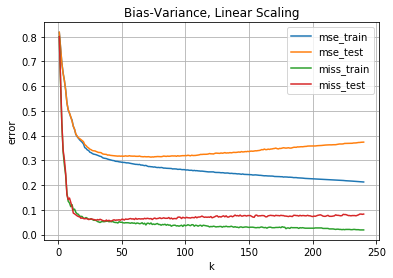

In [9]:
# generate data point
ks = []
mse_trains = []
miss_trains = []
mse_tests = []
miss_tests = []
for k in range(1, 241):
    _, mse_train, miss_train, mse_test, miss_test = linear_regression(data, k)
    ks.append(k)
    mse_trains.append(mse_train)
    miss_trains.append(miss_train)
    mse_tests.append(mse_test)
    miss_tests.append(miss_test)
    
plt.xlabel('k')
plt.ylabel('error')
plt.title('Bias-Variance, Linear Scaling')
plt.grid(True)
p1, = plt.plot(ks, mse_trains, label = 'mse_train')
p2, = plt.plot(ks, mse_tests, label = 'mse_test')
p3, = plt.plot(ks, miss_trains, label = 'miss_train')
p4, = plt.plot(ks, miss_tests, label = 'miss_test')
plt.legend(handles=[p1, p2, p3, p4])
plt.show()

- The following graph shows diagnostics for $k = \{0, 1, 2, ... 240\}$ of PC feaures used. Wopt grows by $10k$ as k increases. From the continuously decreasing $MSE_{train}$, we can see greater $k$ better solves our equation. $MISS_{train}$ also continuously decreases.
- $MSE_{test}$ and $MISS_{test}$ both decrease to minimums around $k = 70$ and $k = 35$ respectivly then steadily increase. The increasing tail of $MSE_{test}$ demonstrates the effects of overfitting. Too much flexibility caused the restulting model to fit itself to random fluctuations in the training data. In other words, when a model becomes too flexible (or is overfitted), the test perfomance is poor.

2. Then, use log scaling of the data

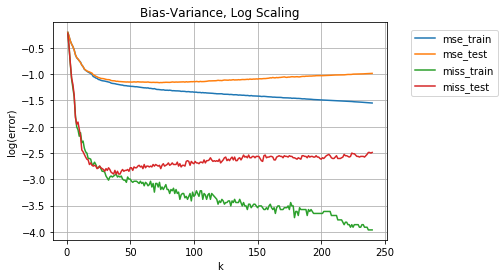

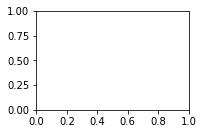

In [10]:
# use log plot
plt.xlabel('k')
plt.ylabel('log(error)')
plt.title('Bias-Variance, Log Scaling')
plt.grid(True)
p1, = plt.plot(ks, np.log(mse_trains), label = 'mse_train')
p2, = plt.plot(ks, np.log(mse_tests), label = 'mse_test')
p3, = plt.plot(ks, np.log(miss_trains), label = 'miss_train')
p4, = plt.plot(ks, np.log(miss_tests), label = 'miss_test')
pos = plt.legend(handles=[p1, p2, p3, p4])

fig = plt.figure()

# small subplot showing how the legend has moved. 
a_x = fig.add_subplot(221)

# Get bounding box of the original legend
bounding_box = pos.get_bbox_to_anchor().inverse_transformed(a_x.transAxes)

# Change position of the legend. 
offset = 0.75
bounding_box.x0 += offset
bounding_box.x1 += offset
pos.set_bbox_to_anchor(bounding_box, transform = a_x.transAxes)

# Update plot
plt.show()

The graph above displays the points discussed above but logarithmically. By this, we mean that a change between two error values in the y-axis is now percieved as the ratio between the said values as opposed to the difference between the two values as in the linear case. This causes the rapid drops at the start of the graphs to become shorter. Jitters in graphs are also more clearly seen. In other words, the log scaling makes small differences more evident.